In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Makaan=pd.read_csv(r"C:\Users\saidhanusha\Documents\Makan.csv")
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4.0,East,1000,2,Unfurnished,"16,500"
1,Khairatabad Road,Independent House,2.0,NorthEast,700,1,Semi-Furnished,"14,000"
2,Shaikpet,Independent House,2.0,NorthEast,1200,1,Unfurnished,"12,000"
3,Nallagandla Gachibowli,Villa,5.0,West,4000,5,Semi-Furnished,"80,000"
4,Moinabad,Villa,5.0,East,7000,5,Furnished,2 L
...,...,...,...,...,...,...,...,...
495,Nizampet,Apartment,3.0,East,1500,3,Semi-Furnished,"28,000"
496,Kukatpally,Apartment,4.0,East,3300,4,Furnished,1.1 L
497,Gachibowli,Apartment,2.0,East,1050,2,Semi-Furnished,"24,000"
498,Gachibowli,Apartment,3.0,West,1700,3,Semi-Furnished,"48,000"


In [3]:
Makaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           500 non-null    object 
 1   property_Type  496 non-null    object 
 2   BHK            496 non-null    float64
 3   FACING         412 non-null    object 
 4   Sqfeet         500 non-null    int64  
 5   BATHROOMS      500 non-null    int64  
 6   STATUS         500 non-null    object 
 7   PRICE          500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [4]:
Makaan.isnull().sum()

AREA              0
property_Type     4
BHK               4
FACING           88
Sqfeet            0
BATHROOMS         0
STATUS            0
PRICE             0
dtype: int64

In [5]:
Makaan[Makaan.isnull().any(axis=1)]


,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
5,Pragathi Nagar Kukatpally,Apartment,3.0,NaN,1570,2,Semi-Furnished,"16,000"
6,Boiguda,Apartment,2.0,NaN,900,1,Unfurnished,"17,000"
7,Moosapet,Apartment,2.0,NaN,1100,2,Semi-Furnished,"15,000"
8,Somajiguda,Apartment,3.0,NaN,1500,2,Semi-Furnished,"20,000"
9,Kothapet,Independent House,3.0,NaN,1700,4,Semi-Furnished,"40,000"
...,...,...,...,...,...,...,...,...
419,Hyderguda,Apartment,2.0,NaN,1050,2,Semi-Furnished,"15,000"
420,Hyderguda,Apartment,3.0,NaN,1350,2,Semi-Furnished,"22,000"
439,Begumpet,Apartment,3.0,NaN,2000,3,Semi-Furnished,"45,000"
455,Kukatpally,Apartment,3.0,NaN,1450,3,Semi-Furnished,"32,000"


In [6]:
Makaan=Makaan.dropna()
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4.0,East,1000,2,Unfurnished,"16,500"
1,Khairatabad Road,Independent House,2.0,NorthEast,700,1,Semi-Furnished,"14,000"
2,Shaikpet,Independent House,2.0,NorthEast,1200,1,Unfurnished,"12,000"
3,Nallagandla Gachibowli,Villa,5.0,West,4000,5,Semi-Furnished,"80,000"
4,Moinabad,Villa,5.0,East,7000,5,Furnished,2 L
...,...,...,...,...,...,...,...,...
495,Nizampet,Apartment,3.0,East,1500,3,Semi-Furnished,"28,000"
496,Kukatpally,Apartment,4.0,East,3300,4,Furnished,1.1 L
497,Gachibowli,Apartment,2.0,East,1050,2,Semi-Furnished,"24,000"
498,Gachibowli,Apartment,3.0,West,1700,3,Semi-Furnished,"48,000"


In [7]:
Makaan=Makaan.reset_index(drop=True)
Makaan    

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4.0,East,1000,2,Unfurnished,"16,500"
1,Khairatabad Road,Independent House,2.0,NorthEast,700,1,Semi-Furnished,"14,000"
2,Shaikpet,Independent House,2.0,NorthEast,1200,1,Unfurnished,"12,000"
3,Nallagandla Gachibowli,Villa,5.0,West,4000,5,Semi-Furnished,"80,000"
4,Moinabad,Villa,5.0,East,7000,5,Furnished,2 L
...,...,...,...,...,...,...,...,...
406,Nizampet,Apartment,3.0,East,1500,3,Semi-Furnished,"28,000"
407,Kukatpally,Apartment,4.0,East,3300,4,Furnished,1.1 L
408,Gachibowli,Apartment,2.0,East,1050,2,Semi-Furnished,"24,000"
409,Gachibowli,Apartment,3.0,West,1700,3,Semi-Furnished,"48,000"


In [8]:
Makaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           411 non-null    object 
 1   property_Type  411 non-null    object 
 2   BHK            411 non-null    float64
 3   FACING         411 non-null    object 
 4   Sqfeet         411 non-null    int64  
 5   BATHROOMS      411 non-null    int64  
 6   STATUS         411 non-null    object 
 7   PRICE          411 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.8+ KB


In [9]:
Makaan["BHK"].unique()

array([4., 2., 5., 3., 6., 1.])

In [10]:
Makaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           411 non-null    object 
 1   property_Type  411 non-null    object 
 2   BHK            411 non-null    float64
 3   FACING         411 non-null    object 
 4   Sqfeet         411 non-null    int64  
 5   BATHROOMS      411 non-null    int64  
 6   STATUS         411 non-null    object 
 7   PRICE          411 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.8+ KB


In [11]:
Makaan['BHK'] = Makaan['BHK'].astype(int)
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4,East,1000,2,Unfurnished,"16,500"
1,Khairatabad Road,Independent House,2,NorthEast,700,1,Semi-Furnished,"14,000"
2,Shaikpet,Independent House,2,NorthEast,1200,1,Unfurnished,"12,000"
3,Nallagandla Gachibowli,Villa,5,West,4000,5,Semi-Furnished,"80,000"
4,Moinabad,Villa,5,East,7000,5,Furnished,2 L
...,...,...,...,...,...,...,...,...
406,Nizampet,Apartment,3,East,1500,3,Semi-Furnished,"28,000"
407,Kukatpally,Apartment,4,East,3300,4,Furnished,1.1 L
408,Gachibowli,Apartment,2,East,1050,2,Semi-Furnished,"24,000"
409,Gachibowli,Apartment,3,West,1700,3,Semi-Furnished,"48,000"


In [12]:
Makaan["AREA"].nunique()

57

In [13]:
Makaan["property_Type"].unique()

array(['Independent House', 'Villa', 'Apartment'], dtype=object)

In [14]:
Makaan["FACING"].unique()

array(['East ', 'NorthEast ', 'West ', 'SouthEast ', 'North ',
       'NorthWest ', 'South '], dtype=object)

In [15]:
Makaan["Sqfeet"].unique()

array([1000,  700, 1200, 4000, 7000, 2509, 2060, 2499, 1360, 3000,  950,
       1600, 2200, 2000, 1300, 1500, 4500, 2800, 2300, 1900, 7500,  550,
        599, 1355, 3100,  800, 1400, 1460, 1950, 1700, 1378, 1350, 2400,
       1250, 1920,  543, 1650, 1150, 2500,  900, 1800,  600, 1980, 1492,
       1050, 1760, 2680, 1878, 3200, 1750, 1599, 1510, 2330,  892, 3223,
       1283, 1798, 2824, 2100, 1375, 2615, 1100, 1742, 1834, 2250, 2850,
       1790, 1550, 1770, 2600, 1745, 3800, 1765, 5625, 2175, 2020, 1345,
       1850, 2050, 2108, 1875, 3400, 1034, 1358, 1450, 1993, 1470, 1410,
       1945, 2595, 1792, 1466, 3300, 1366, 1880, 2140, 2940, 1580, 1925,
       1738, 4070, 6200, 1740], dtype=int64)

In [16]:
Makaan["BATHROOMS"].unique()

array([2, 1, 5, 3, 4], dtype=int64)

In [17]:
Makaan["STATUS"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [18]:
Makaan["PRICE"].unique()

array([' 16,500 ', ' 14,000 ', ' 12,000 ', ' 80,000 ', ' 2 L', ' 13,000 ',
       ' 37,635 ', ' 30,000 ', ' 54,000 ', ' 18,000 ', ' 45,000 ',
       ' 8,500 ', ' 27,000 ', ' 94,000 ', ' 55,000 ', ' 22,000 ',
       ' 75,000 ', ' 49,000 ', ' 6 L', ' 10,000 ', ' 52,000 ', ' 7,500 ',
       ' 42,003 ', ' 1 L', ' 18,700 ', ' 15,000 ', ' 25,000 ', ' 35,000 ',
       ' 8,000 ', ' 34,000 ', ' 20,000 ', ' 52,500 ', ' 40,000 ',
       ' 53,999 ', ' 17,000 ', ' 26,500 ', ' 25,002 ', ' 25,001 ',
       ' 39,000 ', ' 48,000 ', ' 70,000 ', ' 29,000 ', ' 53,000 ',
       ' 50,000 ', ' 44,000 ', ' 74,000 ', ' 61,000 ', ' 37,000 ',
       ' 1.09 L', ' 64,000 ', ' 32,000 ', ' 60,000 ', ' 46,000 ',
       ' 47,000 ', ' 19,000 ', ' 59,000 ', ' 69,000 ', ' 65,000 ',
       ' 62,000 ', ' 70,001 ', ' 1.5 L', ' 60,001 ', ' 80,001 ',
       ' 56,000 ', ' 45,001 ', ' 1.49 L', ' 41,000 ', ' 28,000 ',
       ' 55,001 ', ' 1.8 L', ' 31,000 ', ' 38,000 ', ' 46,500 ',
       ' 73,000 ', ' 45,002 ', ' 68,000 ', ' 1.

In [19]:
Makaan['PRICE'] = Makaan['PRICE'].str.replace(',', '')  # Remove commas
Makaan['PRICE'] = Makaan['PRICE'].apply(lambda x: float(x.replace('L', '')) * 100000 if 'L' in x else float(x))
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4,East,1000,2,Unfurnished,16500.0
1,Khairatabad Road,Independent House,2,NorthEast,700,1,Semi-Furnished,14000.0
2,Shaikpet,Independent House,2,NorthEast,1200,1,Unfurnished,12000.0
3,Nallagandla Gachibowli,Villa,5,West,4000,5,Semi-Furnished,80000.0
4,Moinabad,Villa,5,East,7000,5,Furnished,200000.0
...,...,...,...,...,...,...,...,...
406,Nizampet,Apartment,3,East,1500,3,Semi-Furnished,28000.0
407,Kukatpally,Apartment,4,East,3300,4,Furnished,110000.0
408,Gachibowli,Apartment,2,East,1050,2,Semi-Furnished,24000.0
409,Gachibowli,Apartment,3,West,1700,3,Semi-Furnished,48000.0


In [20]:
Makaan["PRICE"].unique()

array([ 16500.,  14000.,  12000.,  80000., 200000.,  13000.,  37635.,
        30000.,  54000.,  18000.,  45000.,   8500.,  27000.,  94000.,
        55000.,  22000.,  75000.,  49000., 600000.,  10000.,  52000.,
         7500.,  42003., 100000.,  18700.,  15000.,  25000.,  35000.,
         8000.,  34000.,  20000.,  52500.,  40000.,  53999.,  17000.,
        26500.,  25002.,  25001.,  39000.,  48000.,  70000.,  29000.,
        53000.,  50000.,  44000.,  74000.,  61000.,  37000., 109000.,
        64000.,  32000.,  60000.,  46000.,  47000.,  19000.,  59000.,
        69000.,  65000.,  62000.,  70001., 150000.,  60001.,  80001.,
        56000.,  45001., 149000.,  41000.,  28000.,  55001., 180000.,
        31000.,  38000.,  46500.,  73000.,  45002.,  68000., 130000.,
       299000., 329000.,  79000.,  26000.,  19001.,  57000.,  36000.,
        43000.,  42000.,  65002., 110000.,  65001., 350000.,  24000.])

In [21]:
Makaan[Makaan['property_Type']=='Villa']

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
3,Nallagandla Gachibowli,Villa,5,West,4000,5,Semi-Furnished,80000.0
4,Moinabad,Villa,5,East,7000,5,Furnished,200000.0
6,Nagole,Villa,3,West,2509,3,Unfurnished,37635.0
17,Narsingi,Villa,5,West,4500,4,Semi-Furnished,75000.0
18,Kismatpur,Villa,3,West,2800,3,Furnished,80000.0
48,Nizampet,Villa,4,East,2400,3,Unfurnished,30000.0
49,Nizampet,Villa,4,East,2400,2,Unfurnished,30000.0
50,Nizampet,Villa,4,East,2400,2,Unfurnished,30000.0
51,Nizampet,Villa,4,East,2400,2,Unfurnished,30000.0
52,Nizampet,Villa,4,East,2400,3,Unfurnished,30000.0


In [22]:
Makaan['PRICE'] = Makaan['PRICE'].astype(int)
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4,East,1000,2,Unfurnished,16500
1,Khairatabad Road,Independent House,2,NorthEast,700,1,Semi-Furnished,14000
2,Shaikpet,Independent House,2,NorthEast,1200,1,Unfurnished,12000
3,Nallagandla Gachibowli,Villa,5,West,4000,5,Semi-Furnished,80000
4,Moinabad,Villa,5,East,7000,5,Furnished,200000
...,...,...,...,...,...,...,...,...
406,Nizampet,Apartment,3,East,1500,3,Semi-Furnished,28000
407,Kukatpally,Apartment,4,East,3300,4,Furnished,110000
408,Gachibowli,Apartment,2,East,1050,2,Semi-Furnished,24000
409,Gachibowli,Apartment,3,West,1700,3,Semi-Furnished,48000


In [23]:
Makaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           411 non-null    object
 1   property_Type  411 non-null    object
 2   BHK            411 non-null    int32 
 3   FACING         411 non-null    object
 4   Sqfeet         411 non-null    int64 
 5   BATHROOMS      411 non-null    int64 
 6   STATUS         411 non-null    object
 7   PRICE          411 non-null    int32 
dtypes: int32(2), int64(2), object(4)
memory usage: 22.6+ KB


In [25]:
Makaan.describe()

,BHK,Sqfeet,BATHROOMS,PRICE
count,411.000000,411.000000,411.000000,411.000000
mean,2.934307,1948.620438,2.785888,55842.710462
std,0.661164,865.013098,0.668377,49367.527817
min,1.000000,543.000000,1.000000,7500.000000
25%,3.000000,1500.000000,2.000000,38000.000000
50%,3.000000,1800.000000,3.000000,49000.000000
75%,3.000000,2175.000000,3.000000,56000.000000
max,6.000000,7500.000000,5.000000,600000.000000


## EDA

## univariate analyis

In [23]:
Makaan["BHK"]

0      4
1      2
2      2
3      5
4      5
      ..
406    3
407    4
408    2
409    3
410    3
Name: BHK, Length: 411, dtype: int32

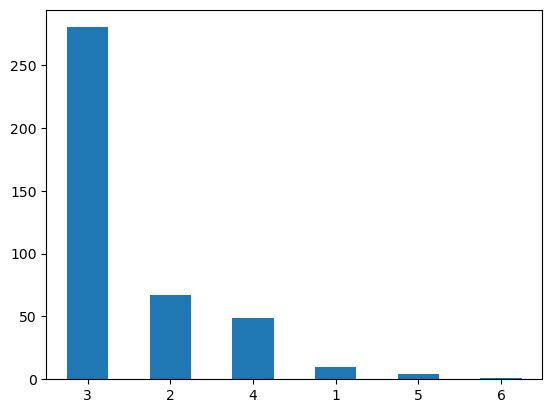

In [24]:
Makaan["BHK"].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

In [25]:
Makaan["Sqfeet"].value_counts()

1700    21
2100    19
1800    18
2800    17
1500    16
        ..
1378     1
2600     1
3800     1
1765     1
1740     1
Name: Sqfeet, Length: 103, dtype: int64

<Axes: ylabel='Frequency'>

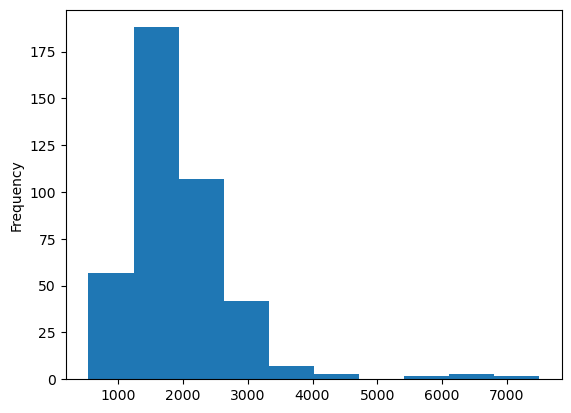

In [26]:
Makaan["Sqfeet"].plot(kind="hist")

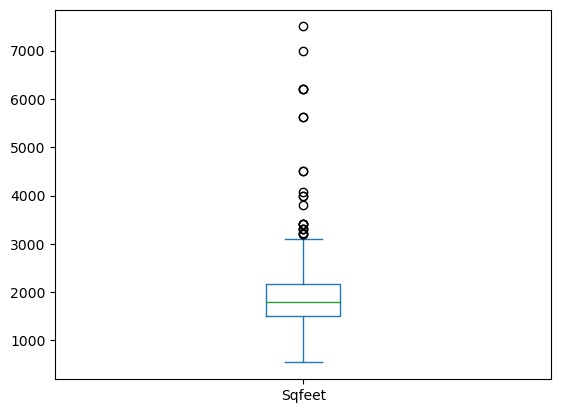

In [27]:
Makaan["Sqfeet"].plot.box()
plt.xticks(rotation = 0)
plt.show()

In [28]:
Makaan["Sqfeet"].value_counts()

1700    21
2100    19
1800    18
2800    17
1500    16
        ..
1378     1
2600     1
3800     1
1765     1
1740     1
Name: Sqfeet, Length: 103, dtype: int64

In [29]:
Makaan["Sqfeet"].median()

1800.0

In [30]:
Makaan['BATHROOMS'].value_counts()

3    257
2    105
4     33
1     12
5      4
Name: BATHROOMS, dtype: int64

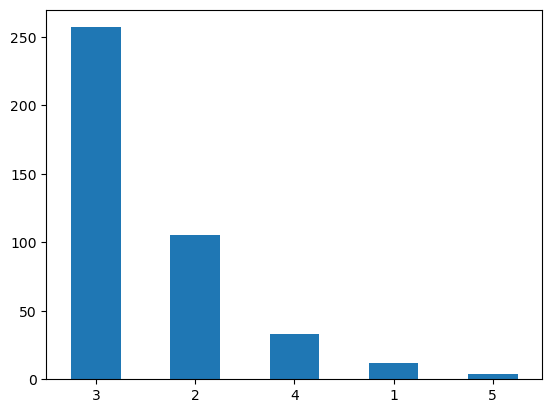

In [31]:
Makaan["BATHROOMS"].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

In [32]:
#Makaan["AREA"].value_counts()

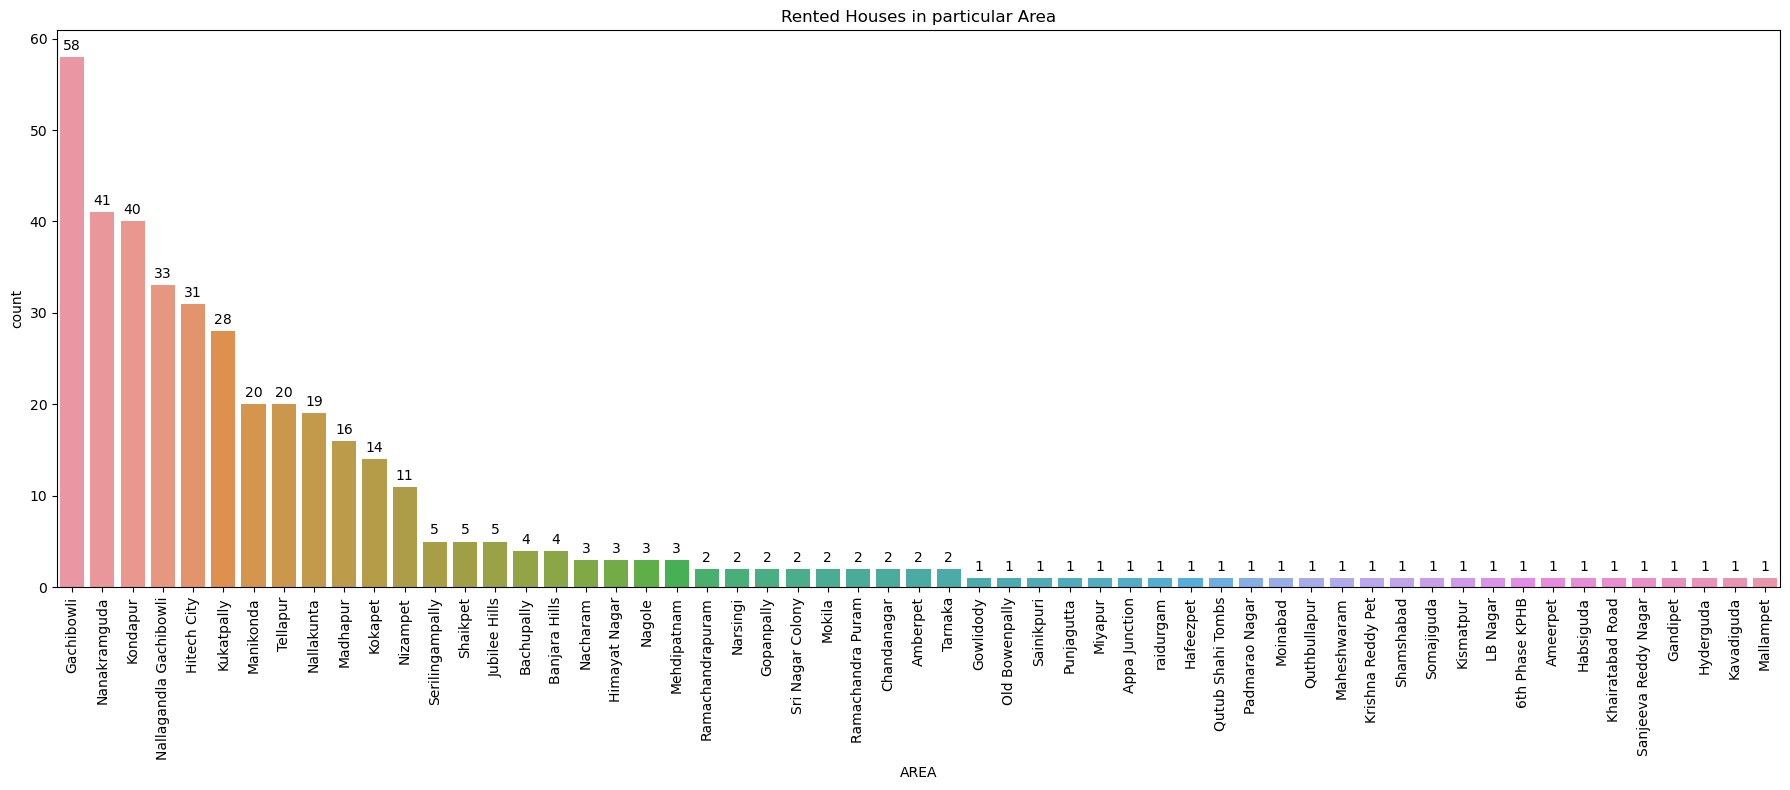

In [33]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x ="AREA",data=Makaan,order=Makaan["AREA"].value_counts().index)
plt.title("Rented Houses in particular Area")
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0,8), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

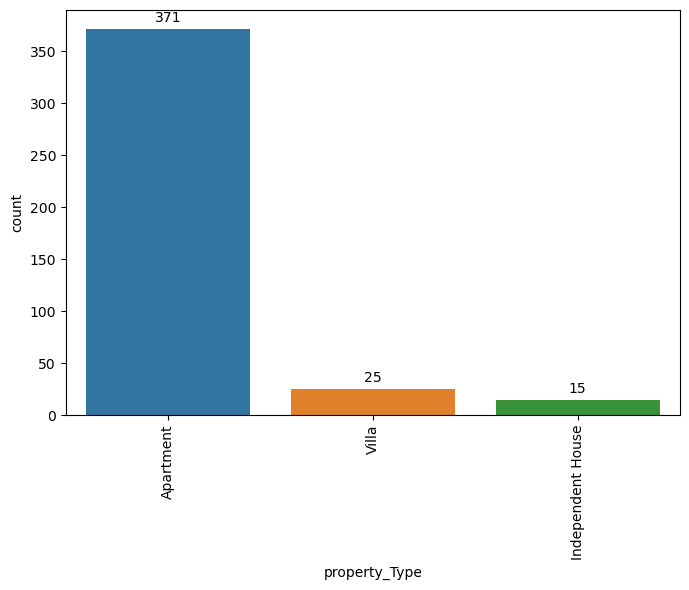

In [34]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x="property_Type",data=Makaan,order= Makaan["property_Type"].value_counts().index)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0,8), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<Axes: xlabel='property_Type', ylabel='count'>

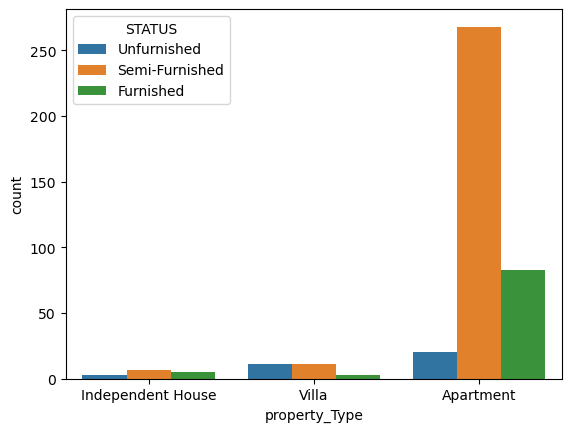

In [35]:

sns.countplot(data=Makaan, x="property_Type", hue="STATUS")

In [36]:
Makaan[Makaan['PRICE']>200000]

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
21,Jubilee Hills,Independent House,4,East,7500,5,Semi-Furnished,600000
250,Madhapur,Apartment,4,NorthEast,3400,4,Furnished,299000
252,Madhapur,Apartment,3,NorthEast,3300,3,Furnished,329000
391,Serilingampally,Villa,4,West,6200,4,Semi-Furnished,350000
392,Serilingampally,Villa,4,West,6200,4,Semi-Furnished,350000
393,Serilingampally,Villa,4,West,6200,4,Semi-Furnished,350000


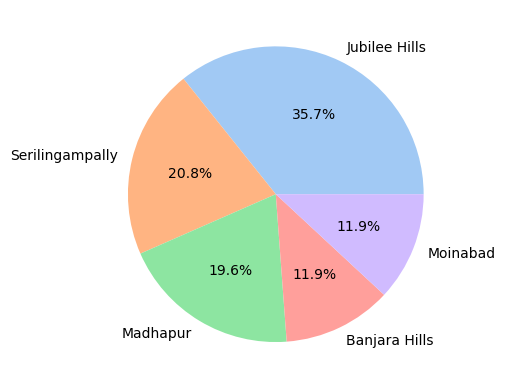

In [37]:
colors = sns.color_palette('pastel')[0:5]
Makaan.groupby("AREA")['PRICE'].max().sort_values(ascending =False)[:5].plot.pie(autopct ="%.1f%%",colors = colors)

plt.ylabel('')
plt.show()

In [42]:
Makaan[Makaan['PRICE']<8000]

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
24,Ameerpet,Apartment,1,East,599,1,Semi-Furnished,7500


In [58]:
Makaan[Makaan['AREA']=="Moinabad"]

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
4,Moinabad,Villa,5,East,7000,5,Furnished,200000


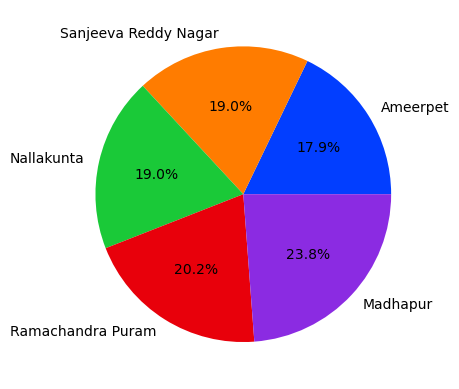

In [64]:
colors = sns.color_palette('bright')[0:5]
Makaan.groupby("AREA")['PRICE'].min().sort_values(ascending = True)[:5].plot.pie(autopct ="%.1f%%",colors = colors)

plt.ylabel('')
plt.show()

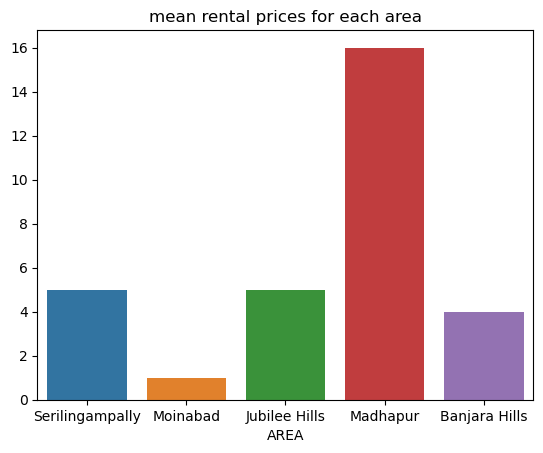

In [62]:
top_areas = Makaan.groupby("AREA")["PRICE"].mean().nlargest(5).index
top_data = Makaan[Makaan["AREA"].isin(top_areas)]
sns.countplot(data=top_data, x="AREA", order=top_areas)
plt.title('mean rental prices for each area')
plt.ylabel('')
plt.show()

In [52]:
#Makaan.groupby("AREA")["PRICE"].min().plot(kind="pie")

In [53]:
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4,East,1000,2,Unfurnished,16500
1,Khairatabad Road,Independent House,2,NorthEast,700,1,Semi-Furnished,14000
2,Shaikpet,Independent House,2,NorthEast,1200,1,Unfurnished,12000
3,Nallagandla Gachibowli,Villa,5,West,4000,5,Semi-Furnished,80000
4,Moinabad,Villa,5,East,7000,5,Furnished,200000
...,...,...,...,...,...,...,...,...
406,Nizampet,Apartment,3,East,1500,3,Semi-Furnished,28000
407,Kukatpally,Apartment,4,East,3300,4,Furnished,110000
408,Gachibowli,Apartment,2,East,1050,2,Semi-Furnished,24000
409,Gachibowli,Apartment,3,West,1700,3,Semi-Furnished,48000


In [54]:
Makaan["STATUS"].value_counts()

Semi-Furnished    286
Furnished          91
Unfurnished        34
Name: STATUS, dtype: int64

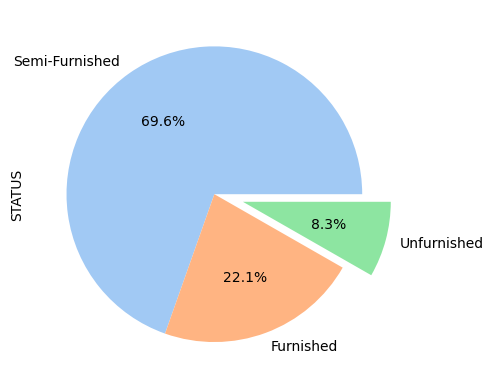

In [55]:
colors = sns.color_palette('pastel')[0:4]
Makaan['STATUS'].value_counts().plot(kind='pie',colors=colors, explode=[0,0,0.2],autopct ="%.1f%%")
plt.show()

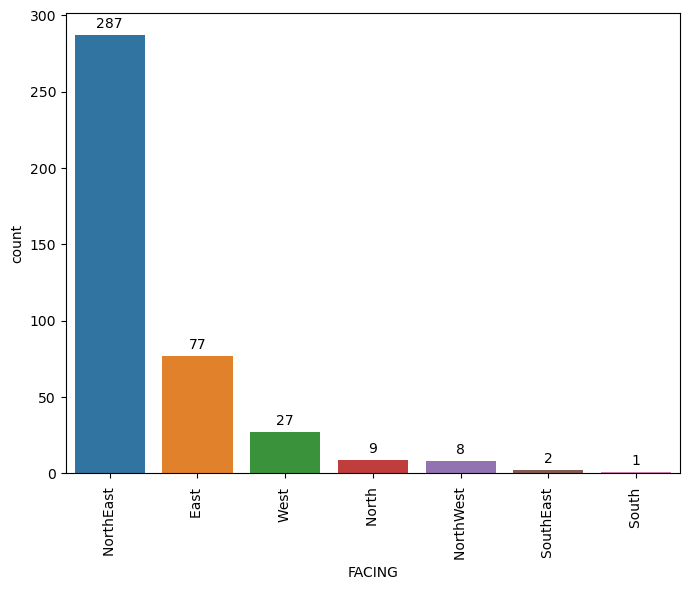

In [56]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x="FACING",data=Makaan,order= Makaan["FACING"].value_counts().index)
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0,8), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

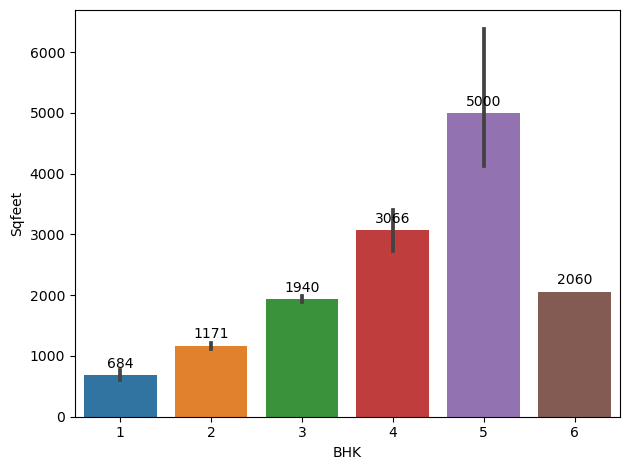

In [57]:
ax = sns.barplot(x='BHK', y='Sqfeet', data=Makaan)
plt.xticks(rotation = 0)
#plt.show()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0,8), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [58]:
Makaan[Makaan["BHK"] == 6]

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
7,Maheshwaram,Apartment,6,East,2060,3,Semi-Furnished,30000


<Axes: xlabel='BATHROOMS', ylabel='Sqfeet'>

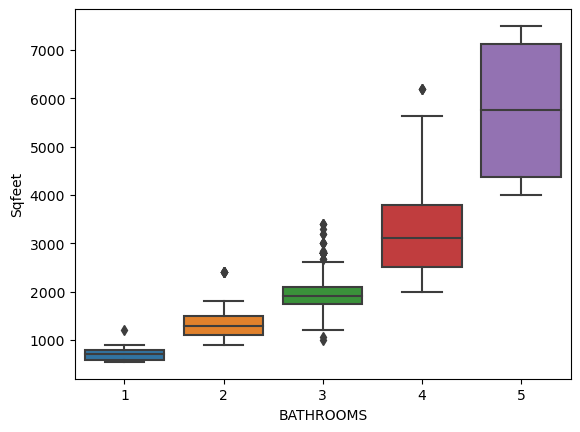

In [59]:
sns.boxplot(data=Makaan, x="BATHROOMS", y="Sqfeet")

<Axes: xlabel='STATUS', ylabel='PRICE'>

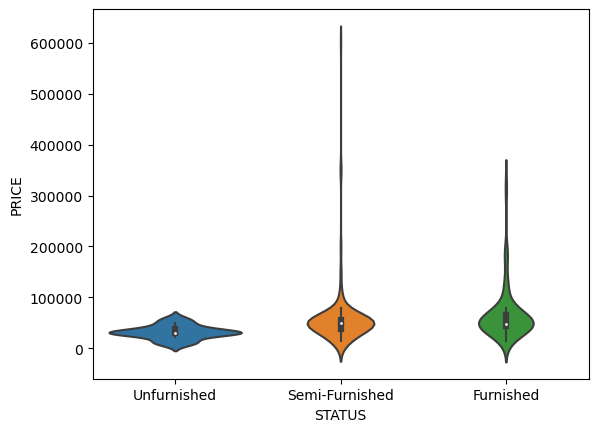

In [60]:
sns.violinplot(data=Makaan, x="STATUS", y="PRICE")

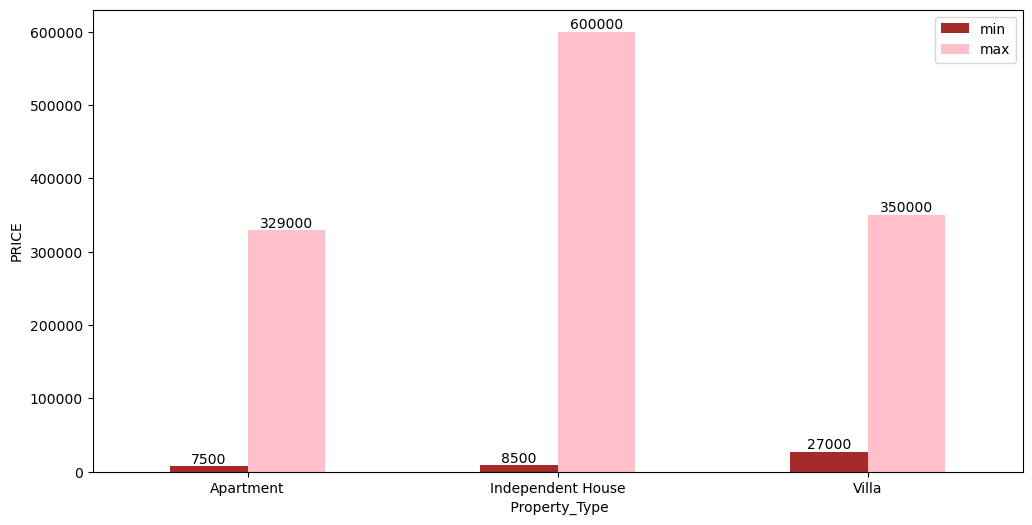

In [61]:
bar_colors = ['brown','pink']

ax= Makaan.groupby("property_Type")["PRICE"].agg(["min","max"]).plot(kind="bar",color = bar_colors,figsize=(12,6))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel(' Property_Type')
plt.ylabel('PRICE')
plt.xticks(rotation = 0)
plt.show()

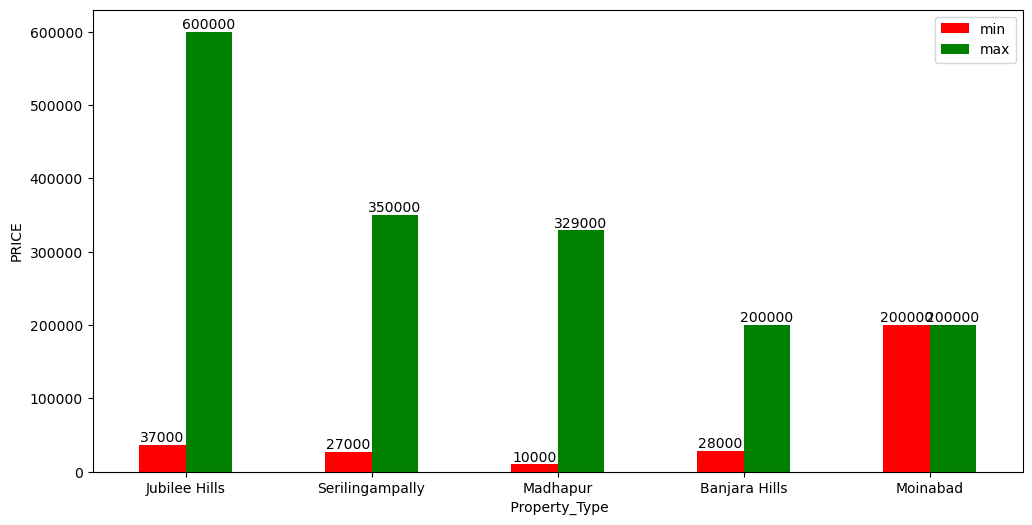

In [62]:
bar_colors = ['red','green']

ax= Makaan.groupby("AREA")["PRICE"].agg(["min","max"]).sort_values(by = "max",ascending =False)[:5].plot(kind="bar",color = bar_colors,figsize=(12,6))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel(' Property_Type')
plt.ylabel('PRICE')
plt.xticks(rotation = 0)
plt.show()

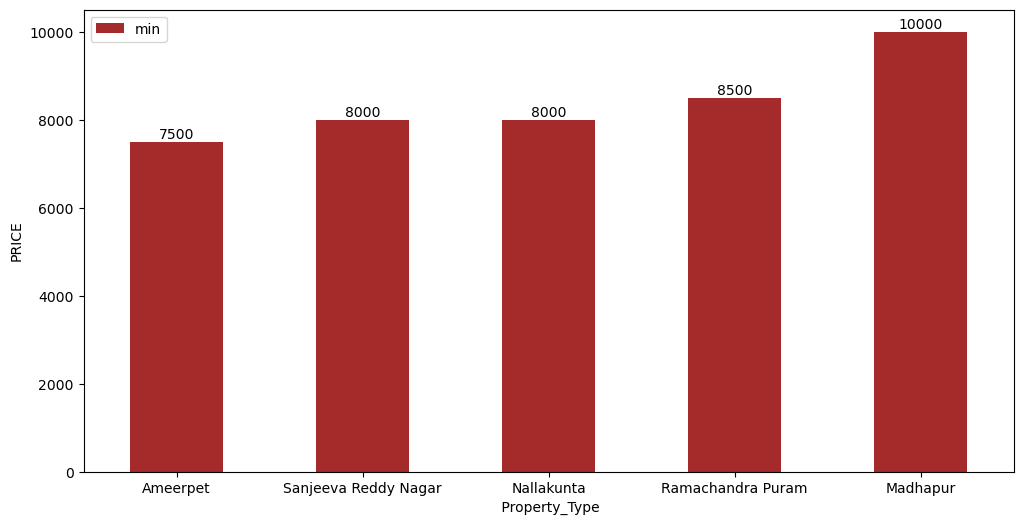

In [33]:
bar_colors = ['brown']

ax= Makaan.groupby("AREA")["PRICE"].agg(["min"]).sort_values(by = "min",ascending = True)[:5].plot(kind="bar",color = bar_colors,figsize=(12,6))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel(' Property_Type')
plt.ylabel('PRICE')
plt.xticks(rotation = 0)
plt.show()

In [63]:
Makaan[Makaan["AREA"]=="Moinabad"]

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
4,Moinabad,Villa,5,East,7000,5,Furnished,200000


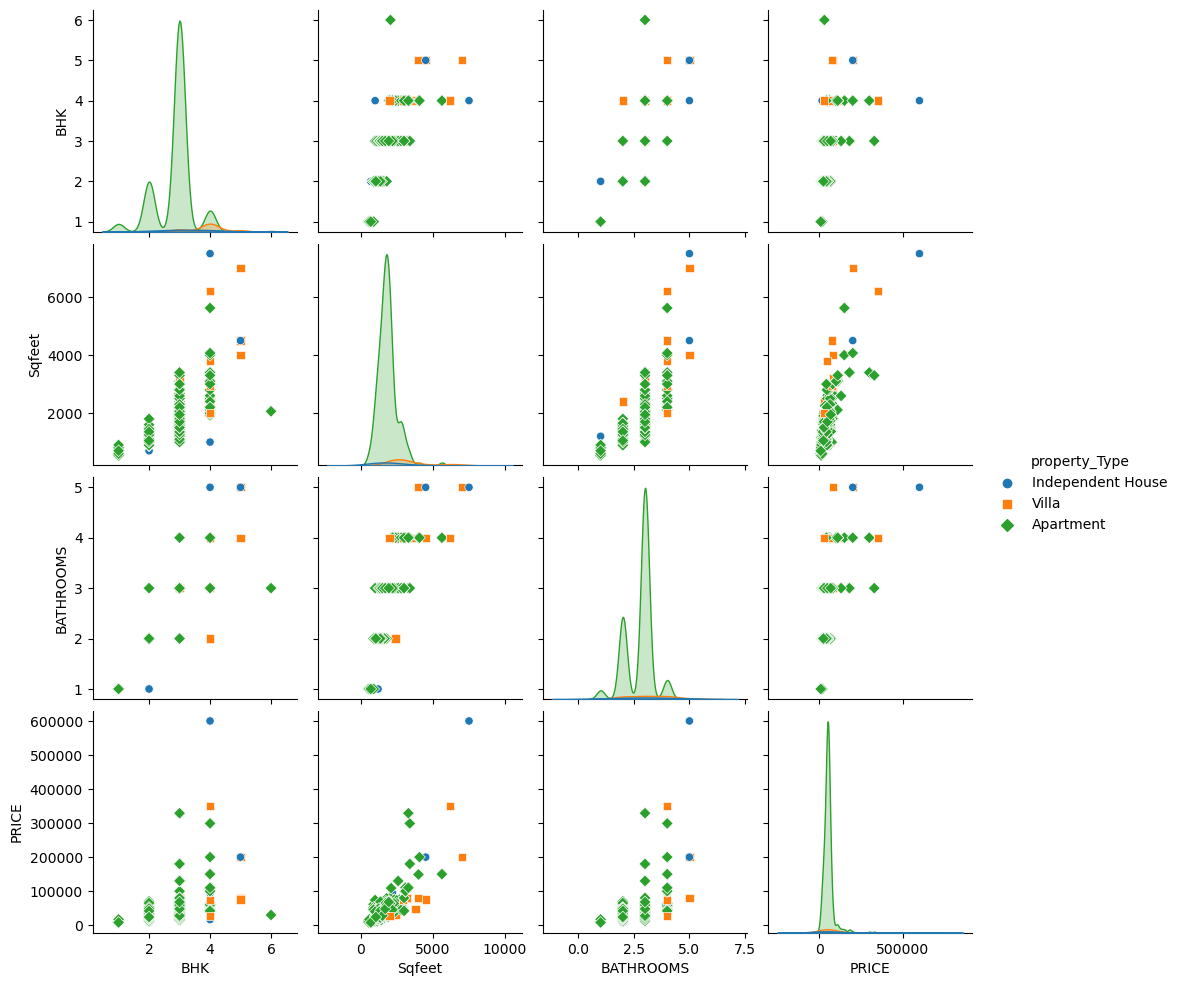

In [64]:
sns.pairplot(Makaan, hue='property_Type',  markers=["o", "s", "D"])

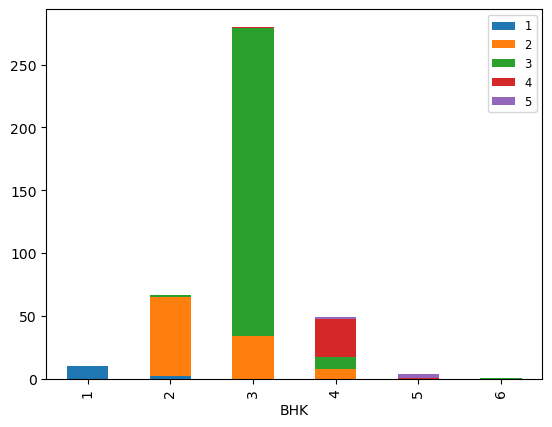

In [65]:
pd.crosstab(index=Makaan["BHK"],columns=Makaan["BATHROOMS"]).plot(kind="bar",stacked=True).legend(bbox_to_anchor=(1,1),fontsize='small')

In [66]:
#Makaan[Makaan["BHK"]==4]

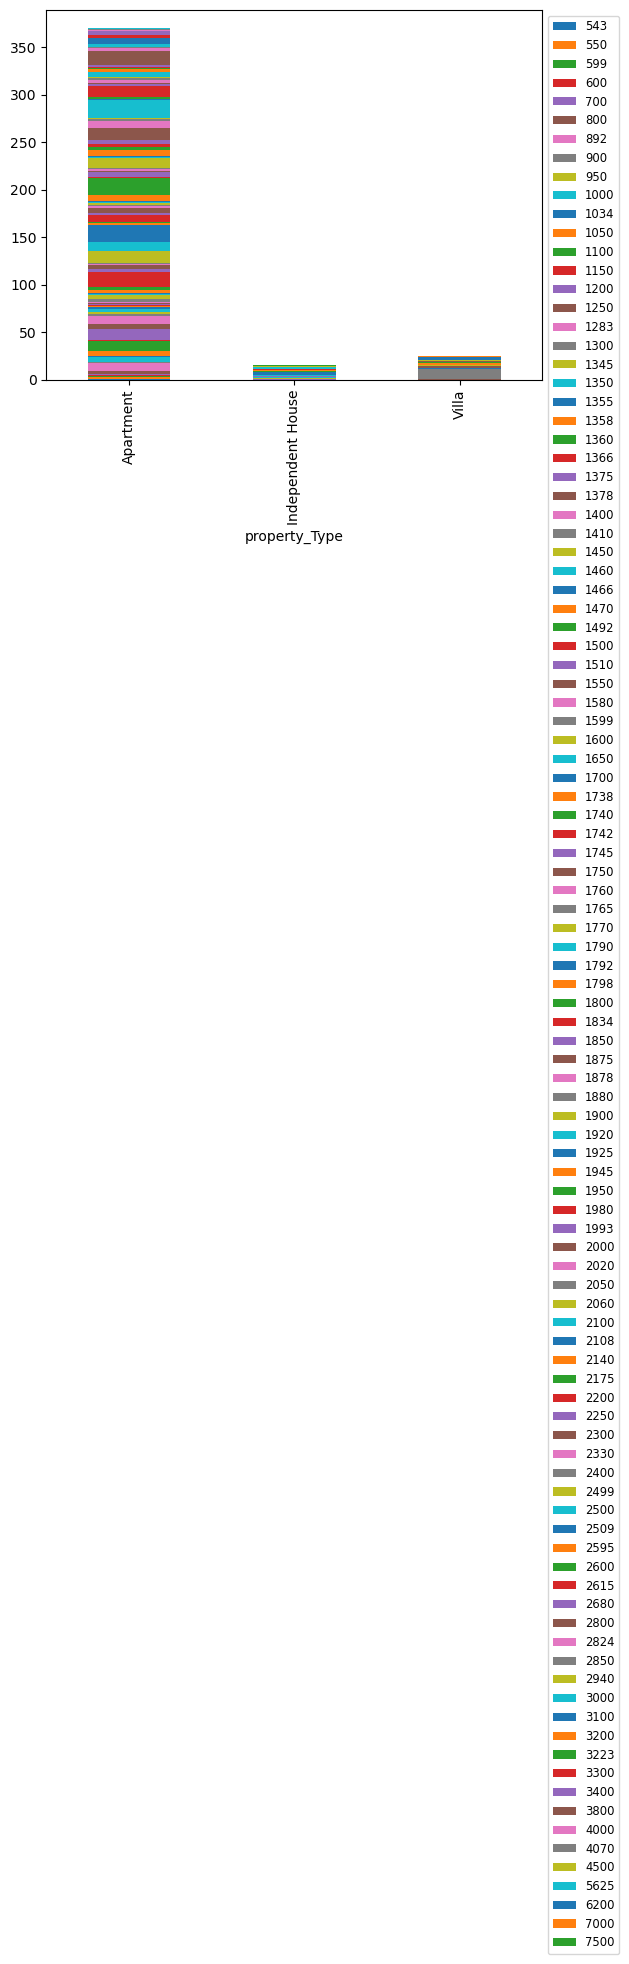

In [67]:
pd.crosstab(index=Makaan["property_Type"],columns=Makaan["Sqfeet"]).plot(kind="bar",stacked=True).legend(bbox_to_anchor=(1,1),fontsize='small')

In [68]:
Makaan["Sqfeet"].nunique()

103

<Axes: xlabel='property_Type', ylabel='Sqfeet'>

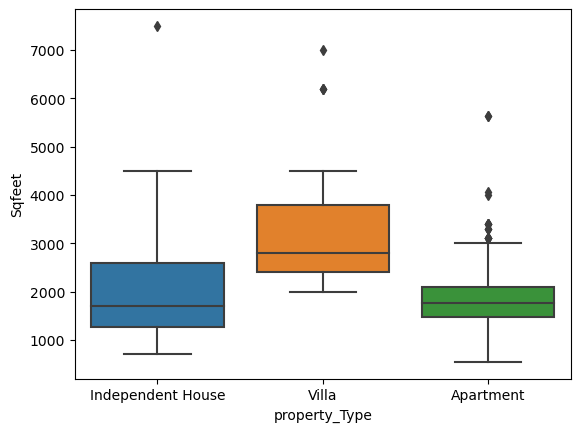

In [69]:
sns.boxplot(data=Makaan, x="property_Type", y="Sqfeet")

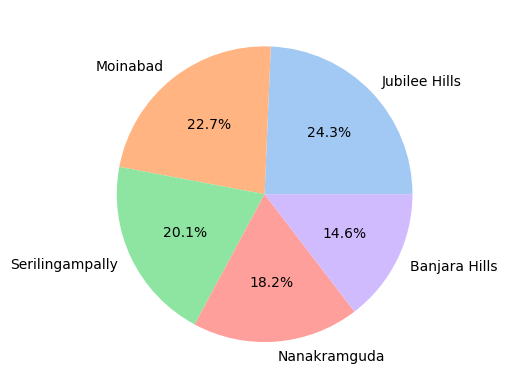

In [70]:
colors = sns.color_palette('pastel')[0:5]
Makaan.groupby("AREA")['Sqfeet'].max().sort_values(ascending =False)[:5].plot.pie(autopct ="%.1f%%",colors = colors)

plt.ylabel('')
plt.show()

<Axes: xlabel='PRICE', ylabel='Sqfeet'>

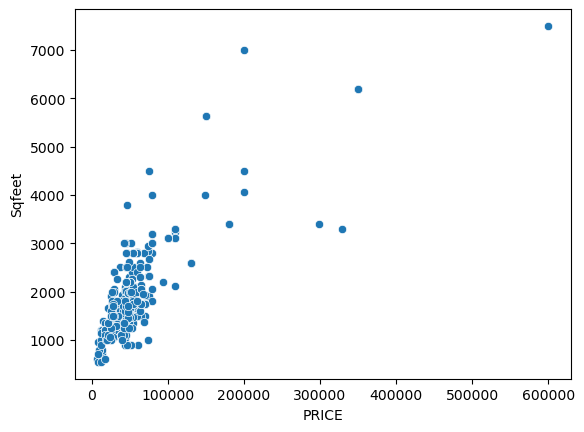

In [71]:
sns.scatterplot(x=Makaan["PRICE"],y=Makaan["Sqfeet"])

<Axes: xlabel='BHK', ylabel='PRICE'>

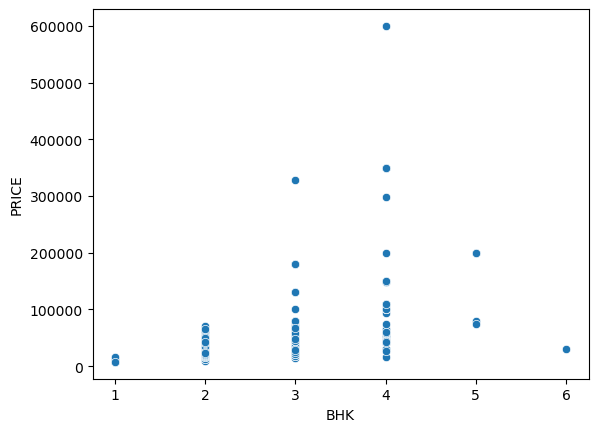

In [72]:
sns.scatterplot(x=Makaan["BHK"],y=Makaan["PRICE"])

<Axes: xlabel='BATHROOMS', ylabel='PRICE'>

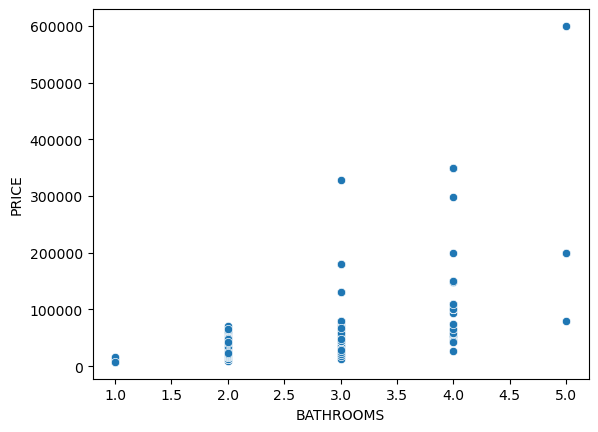

In [73]:
sns.scatterplot(x=Makaan["BATHROOMS"],y=Makaan["PRICE"])

In [74]:
Makaan.corr()

C:\Users\saidhanusha\AppData\Local\Temp\ipykernel_860\2235493382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Makaan.corr()


,BHK,Sqfeet,BATHROOMS,PRICE
BHK,1.000000,0.669116,0.773914,0.387229
Sqfeet,0.669116,1.000000,0.718529,0.768727
BATHROOMS,0.773914,0.718529,1.000000,0.504861
PRICE,0.387229,0.768727,0.504861,1.000000


C:\Users\saidhanusha\AppData\Local\Temp\ipykernel_860\3249702506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Makaan.corr(),cmap = "RdYlGn",annot=True)


<Axes: >

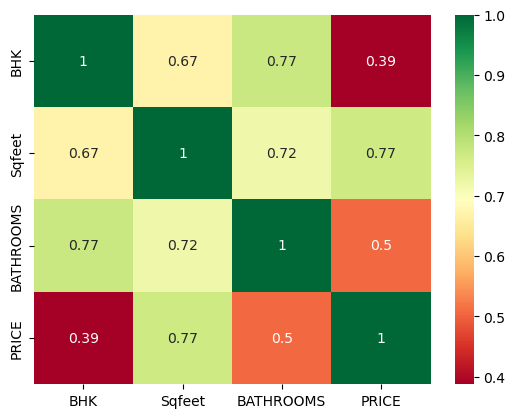

In [75]:
sns.heatmap(Makaan.corr(),cmap = "RdYlGn",annot=True)

In [76]:
Makaan

,AREA,property_Type,BHK,FACING,Sqfeet,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4,East,1000,2,Unfurnished,16500
1,Khairatabad Road,Independent House,2,NorthEast,700,1,Semi-Furnished,14000
2,Shaikpet,Independent House,2,NorthEast,1200,1,Unfurnished,12000
3,Nallagandla Gachibowli,Villa,5,West,4000,5,Semi-Furnished,80000
4,Moinabad,Villa,5,East,7000,5,Furnished,200000
...,...,...,...,...,...,...,...,...
406,Nizampet,Apartment,3,East,1500,3,Semi-Furnished,28000
407,Kukatpally,Apartment,4,East,3300,4,Furnished,110000
408,Gachibowli,Apartment,2,East,1050,2,Semi-Furnished,24000
409,Gachibowli,Apartment,3,West,1700,3,Semi-Furnished,48000


Text(0.5, 1.0, 'Count of 2 BHK and 3 BHK Properties by Area')

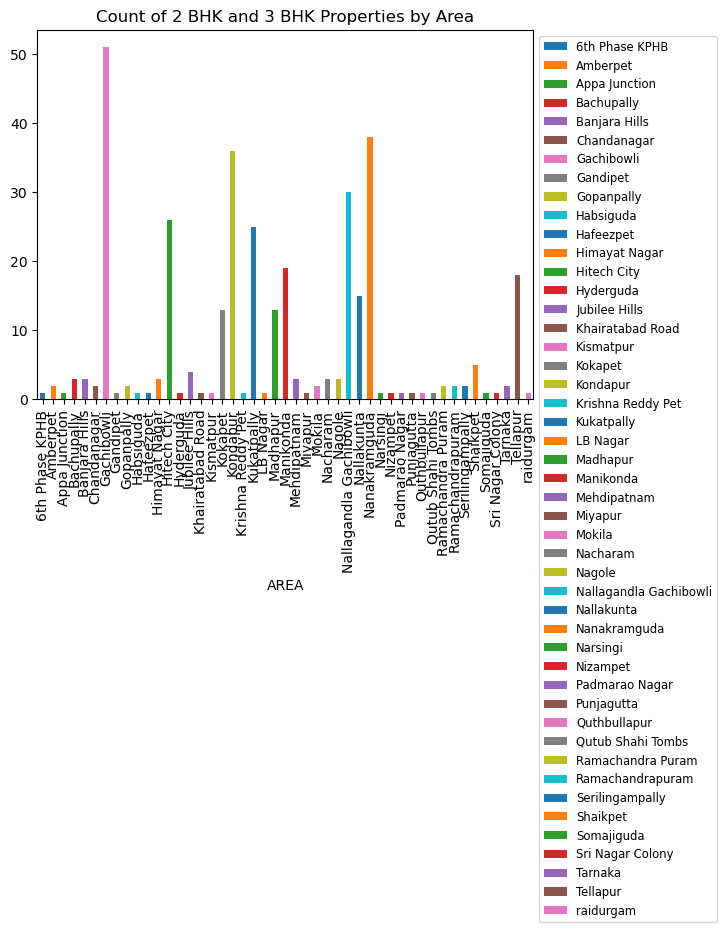

In [77]:
Three_BHK = Makaan[(Makaan["BHK"]== 3) | (Makaan["BHK"]== 2) ]
pd.crosstab(index=Makaan["AREA"],columns= Three_BHK["AREA"] ).plot(kind="bar",stacked=True).legend(bbox_to_anchor=(1,1),fontsize='small')
plt.title('Count of 2 BHK and 3 BHK Properties by Area')

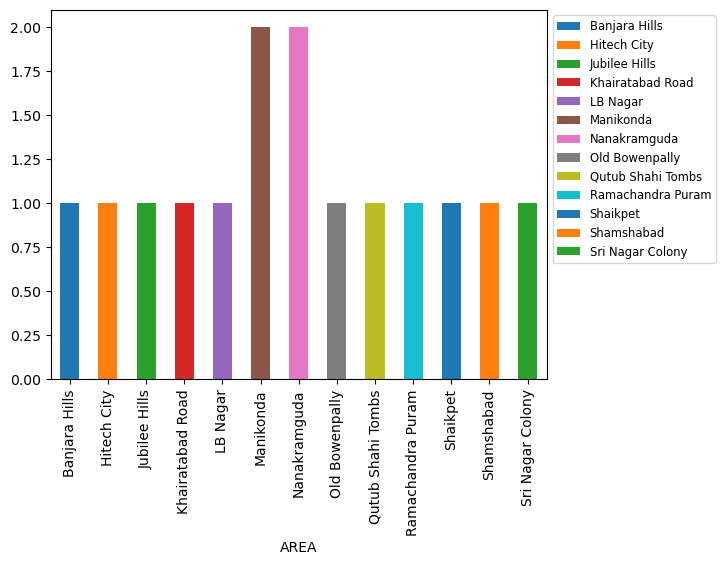

In [78]:
I_H = Makaan[Makaan['property_Type'] == 'Independent House']
pd.crosstab(index=Makaan["AREA"],columns= I_H["AREA"] ).plot(kind="bar",stacked=True).legend(bbox_to_anchor=(1,1),fontsize='small')

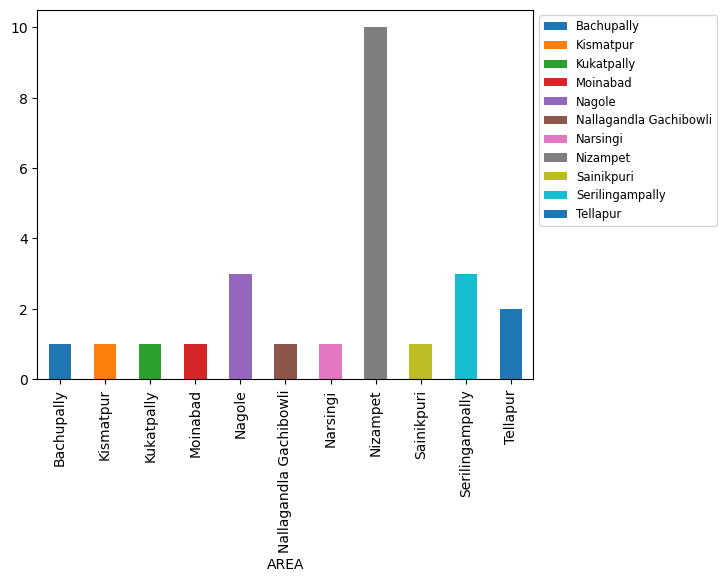

In [29]:
I_H = Makaan[Makaan['property_Type'] == 'Villa']
pd.crosstab(index=Makaan["AREA"],columns= I_H["AREA"] ).plot(kind="bar",stacked= True).legend(bbox_to_anchor=(1,1),fontsize='small')

In [79]:
Makaan["FACING"].value_counts()

NorthEast     287
East           77
West           27
North           9
NorthWest       8
SouthEast       2
South           1
Name: FACING, dtype: int64

<Axes: xlabel='FACING', ylabel='count'>

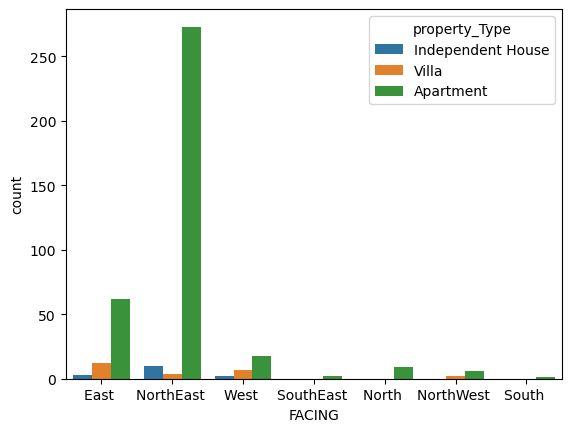

In [81]:
sns.countplot(data=Makaan, x="FACING", hue="property_Type")